In [31]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16

In [32]:
nx=41
dx=2./(nx-1)
nt=40
nu=0.3 
sigma=.2
dt=sigma*dx**2/nu
x=numpy.linspace(0,2,nx)
ubound=numpy.where(x>=0.5)
lbound=numpy.where(x<=1)
u=numpy.ones(nx)
u[numpy.intersect1d(lbound, ubound)]=2
un=numpy.ones(nx)
x

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
        1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
        1.8 ,  1.85,  1.9 ,  1.95,  2.  ])

(0, 2.5)

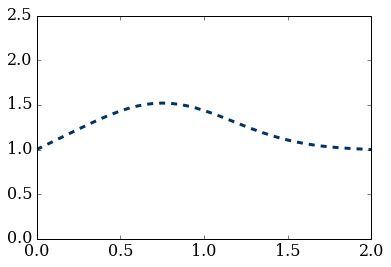

In [38]:
for n in range(nt):
    un=u.copy()
    u[1:-1]=un[1:-1] + nu*dt/dx**2*(un[2:] -2*un[1:-1]+un[0:-2])
pyplot.plot(x,u, color='#003366', ls='--', lw=3)
pyplot.ylim(0, 2.5)

In [45]:
from matplotlib import animation
from IPython.display import HTML
nt=1000
u=numpy.ones(nx)
u[numpy.intersect1d(lbound,ubound)]=2
un=numpy.ones(nx)
un

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.])

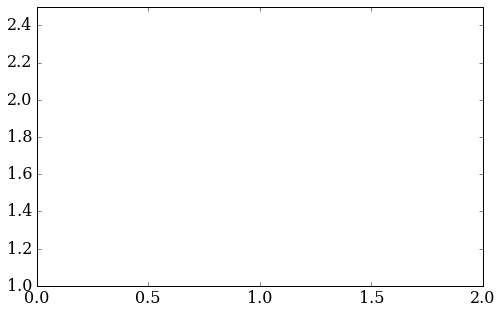

In [46]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,2),ylim=(1,2.5))
line = ax.plot([],[], color='#003366', ls='--', lw=3)[0]

In [47]:
def diffusion(i):
    line.set_data(x,u)
    
    un = u.copy() 
    u[1:-1] = un[1:-1] + nu*dt/dx**2*(un[2:] -2*un[1:-1] +un[0:-2]) 
anim=animation.FuncAnimation(fig, diffusion, frames=nt, interval=100)
HTML(anim.to_html5_video())